In [2]:
import pandas as pd
import numpy as np

In [3]:
features=pd.read_csv('txs_features.csv')
labels=pd.read_csv('txs_classes.csv')
data=features.merge(labels,on="txId")

In [4]:
data

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,158304003,49,-0.165622,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203765,158303998,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203766,158303966,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203767,161526077,49,-0.172212,-0.139573,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.162856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [5]:
print(data.shape)
print(data.dtypes)
print(data.head())
print(data.tail)
print(data.info())
print(data.describe())

(203769, 185)
txId                 int64
Time step            int64
Local_feature_1    float64
Local_feature_2    float64
Local_feature_3    float64
                    ...   
out_BTC_max        float64
out_BTC_mean       float64
out_BTC_median     float64
out_BTC_total      float64
class                int64
Length: 185, dtype: object
    txId  Time step  Local_feature_1  Local_feature_2  Local_feature_3  \
0   3321          1        -0.169615        -0.184668        -1.201369   
1  11108          1        -0.137586        -0.184668        -1.201369   
2  51816          1        -0.170103        -0.184668        -1.201369   
3  68869          1        -0.114267        -0.184668        -1.201369   
4  89273          1         5.202107        -0.210553        -1.756361   

   Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
0        -0.121970        -0.043875        -0.113002        -0.061584   
1        -0.121970        -0.043875        -0.113002        -0.061584  

In [6]:
data['class'].value_counts()

class
3    157205
2     42019
1      4545
Name: count, dtype: int64

#### 1. illicit     2. licit     3.unknown

In [7]:
data=data.drop(columns=["txId"]) # because we dont need txId column for training.
data

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,-0.166062,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,-0.133751,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,-0.166555,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,-0.118555,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,5.252974,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,49,-0.165622,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156113,-0.162033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203765,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,-0.163463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203766,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,-0.163463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203767,49,-0.172212,-0.139573,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.162856,-0.168681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


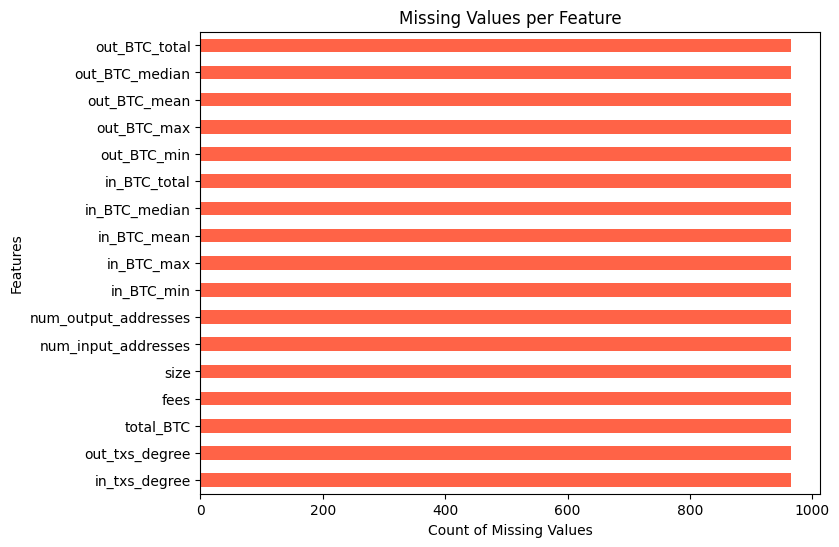

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

missing = data.isnull().sum()
missing = missing[missing > 0]  

missing.sort_values().plot.barh(figsize=(8,6), color="tomato")
plt.xlabel("Count of Missing Values")
plt.ylabel("Features")
plt.title("Missing Values per Feature")
plt.show()


In [9]:
data[data.isnull().any(axis=1)]['class'] ## the class feture only got 2 and 3 in the missing value rows

202804    2
202805    2
202806    2
202807    2
202808    2
         ..
203764    3
203765    3
203766    3
203767    3
203768    3
Name: class, Length: 965, dtype: int64

In [10]:
data[data.isnull().any(axis=1)]['class'].count()

np.int64(965)

### i think we remove the above rows because it doesnt even have 1(illicit). 

In [11]:
data = data[~data.isnull().any(axis=1)]  # ~ means NOT
data = data.reset_index(drop=True)

#### Removed empty rows 

In [12]:
data 

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,-0.166062,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,-0.133751,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,-0.166555,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,-0.118555,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,5.252974,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,0.568363,...,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844,3
202800,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,0.557528,...,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053,3
202801,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,0.553434,...,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726,3
202802,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,0.547543,...,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932,3


### check duplicated rows

In [13]:
data[data.duplicated()]

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class


### check outliers

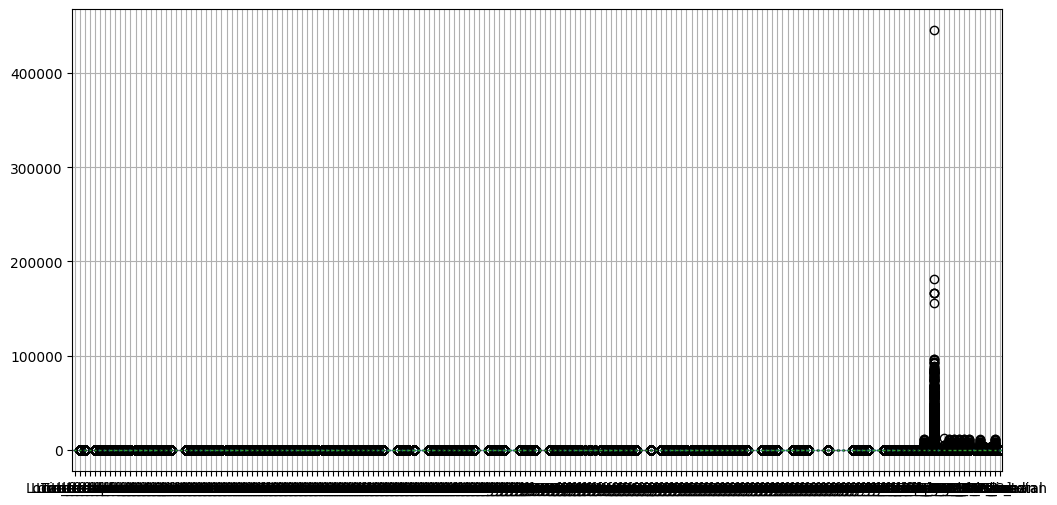

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

data.boxplot(figsize=(12,6))
plt.show()

<Axes: ylabel='fees'>

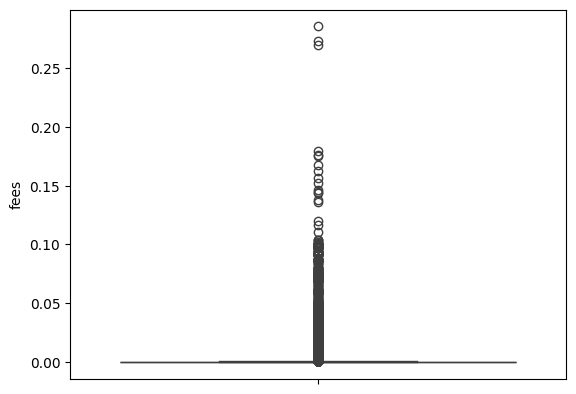

In [15]:
sns.boxplot(data['fees'])

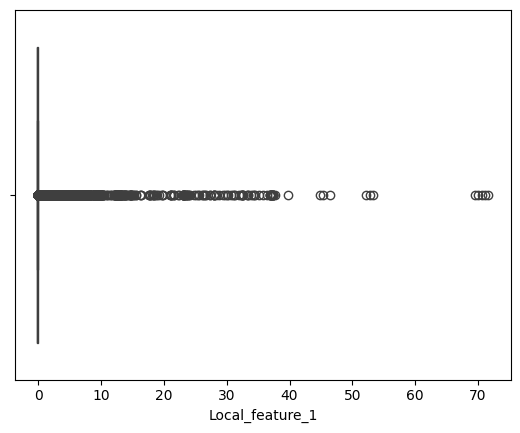

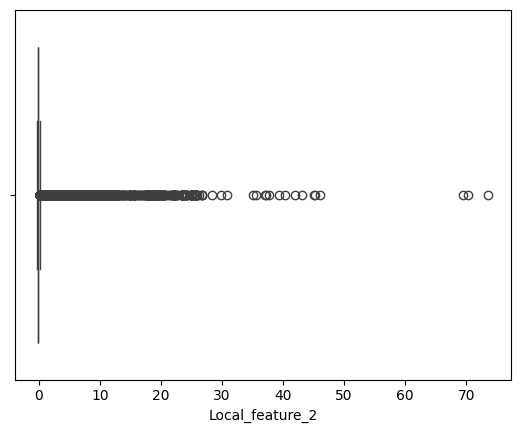

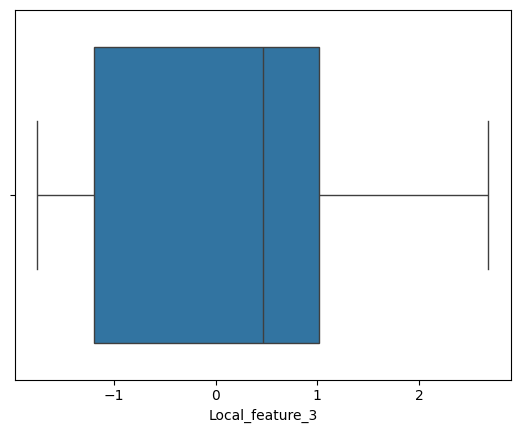

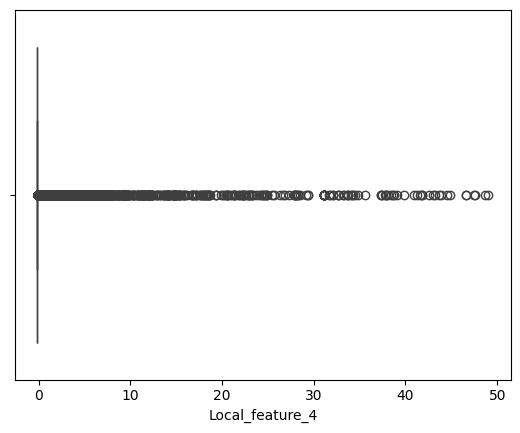

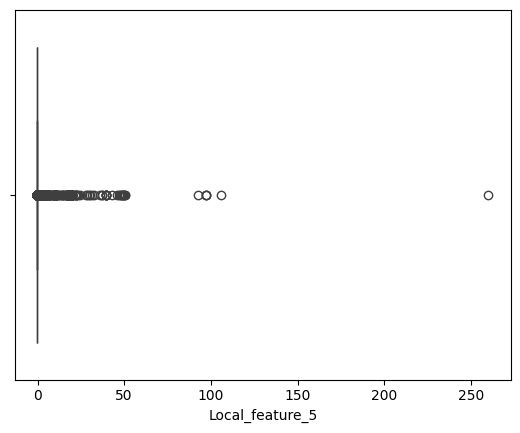

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [col for col in data.columns if "Local_feature" in col]
for col in numeric_cols[:5]:  # check first 5 features
    sns.boxplot(x=data[col])
    plt.show()


### We dont remove the outliers as these extreme values are needed for in our case of problem. Fraud detection = anomaly detection, so outliers are usually signal, not noise.

#### Remove the rows with unknown class

In [23]:
data=data[data['class']!=3]
data

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
3,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,-0.118555,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,5.252974,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
11,1,-0.172726,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163383,-0.169201,...,0.040774,0.040774,0.040774,0.040774,9.480000e-04,0.039726,0.020337,0.020337,0.040674,2
22,1,-0.172921,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163581,-0.169397,...,0.010000,0.010000,0.010000,0.010000,2.900000e-03,0.006900,0.004900,0.004900,0.009800,2
25,1,-0.169967,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160559,-0.166417,...,0.478277,0.478277,0.478277,0.478277,4.630000e-02,0.431877,0.239088,0.239088,0.478177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202762,49,-0.039416,-0.118083,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.026985,-0.034715,...,21.175927,21.175927,21.175927,21.175927,4.005752e-02,21.135512,10.587785,10.587785,21.175569,2
202763,49,-0.050308,-0.112834,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.038129,-0.045703,...,19.449182,19.449182,19.449182,19.449182,1.000000e-02,19.438805,9.724402,9.724402,19.448805,2
202764,49,-0.154605,-0.116753,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.144840,-0.150918,...,2.914019,2.914019,2.914019,2.914019,3.886639e-01,2.524993,1.456828,1.456828,2.913657,2
202765,49,0.708000,-0.118083,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,0.737731,0.719284,...,139.670987,139.670987,139.670987,139.670987,1.018483e-01,139.568782,69.835315,69.835315,139.670630,2


In [18]:
min_values=data.min()
min_values

max_values=data.max()
max_values,min_values

(Time step             49.000000
 Local_feature_1       71.681966
 Local_feature_2       73.595052
 Local_feature_3        2.683580
 Local_feature_4       49.027598
                        ...     
 out_BTC_max        11311.828314
 out_BTC_mean        2998.404230
 out_BTC_median      2998.404230
 out_BTC_total      11391.855937
 class                  3.000000
 Length: 184, dtype: float64,
 Time step          1.000000
 Local_feature_1   -0.172983
 Local_feature_2   -0.210553
 Local_feature_3   -1.756361
 Local_feature_4   -0.121970
                      ...   
 out_BTC_max        0.000006
 out_BTC_mean       0.000006
 out_BTC_median     0.000005
 out_BTC_total      0.000006
 class              1.000000
 Length: 184, dtype: float64)

In [55]:
temp_y=data['class'] ## stroign the class feeature temporarily
temp_y=temp_y.reset_index()
temp_y=temp_y.drop(columns='index')
temp_y

,class
0,2
1,2
2,2
3,2
4,2
...,...
46040,2
46041,2
46042,2
46043,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normalized_data=scaler.fit_transform(data)

data_scaled=pd.DataFrame(normalized_data,columns=data.columns)
data_scaled=data_scaled.drop(columns='class')

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,0.0,0.001469,0.000351,0.125,0.003053,0.000076,0.0,0.013699,0.000049,0.001263,...,0.000049,0.001263,0.000490,0.000158,0.001469,6.113009e-04,0.001284,0.002315,2.315078e-03,0.001469
1,0.0,0.134513,0.000000,0.000,0.000000,1.000000,0.0,0.000000,0.134513,0.134513,...,0.134513,0.134513,0.134513,0.134513,0.134513,6.466160e-11,0.006557,0.000032,2.131794e-07,0.134513
2,0.0,0.000006,0.000351,0.125,0.000000,0.000076,0.0,0.000000,0.000006,0.000006,...,0.000006,0.000006,0.000006,0.000006,0.000006,4.715323e-07,0.000006,0.000010,1.010949e-05,0.000006
3,0.0,0.000002,0.000701,0.125,0.000000,0.000076,0.0,0.000000,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,0.000002,1.442451e-06,0.000001,0.000002,2.431246e-06,0.000002
4,0.0,0.000075,0.000351,0.125,0.000000,0.000076,0.0,0.000000,0.000075,0.000075,...,0.000075,0.000075,0.000075,0.000075,0.000075,2.302948e-05,0.000069,0.000119,1.189158e-04,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46040,1.0,0.003343,0.001253,0.625,0.000000,0.000076,0.0,0.000000,0.003343,0.003343,...,0.003343,0.003343,0.003343,0.003343,0.003343,1.992449e-05,0.003359,0.005266,5.266326e-03,0.003343
46041,1.0,0.003070,0.001324,0.625,0.000000,0.000076,0.0,0.000000,0.003070,0.003070,...,0.003070,0.003070,0.003070,0.003070,0.003070,4.973969e-06,0.003089,0.004837,4.836882e-03,0.003070
46042,1.0,0.000460,0.001271,0.625,0.000000,0.000076,0.0,0.000000,0.000460,0.000460,...,0.000460,0.000460,0.000460,0.000460,0.000460,1.933202e-04,0.000401,0.000725,7.246160e-04,0.000460
46043,1.0,0.022047,0.001253,0.625,0.000000,0.000076,0.0,0.000000,0.022047,0.022047,...,0.022047,0.022047,0.022047,0.022047,0.022047,5.065905e-05,0.022179,0.034736,3.473587e-02,0.022047


In [43]:
len(data_scaled),len(temp_y)

(46045, 46045)

## Below is the dataset after min max normalisation . class column is excluded in this. Also the index for everything has been reset . 

In [57]:
data_scaled['class']=temp_y
data_scaled

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,0.0,0.001469,0.000351,0.125,0.003053,0.000076,0.0,0.013699,0.000049,0.001263,...,0.001263,0.000490,0.000158,0.001469,6.113009e-04,0.001284,0.002315,2.315078e-03,0.001469,2
1,0.0,0.134513,0.000000,0.000,0.000000,1.000000,0.0,0.000000,0.134513,0.134513,...,0.134513,0.134513,0.134513,0.134513,6.466160e-11,0.006557,0.000032,2.131794e-07,0.134513,2
2,0.0,0.000006,0.000351,0.125,0.000000,0.000076,0.0,0.000000,0.000006,0.000006,...,0.000006,0.000006,0.000006,0.000006,4.715323e-07,0.000006,0.000010,1.010949e-05,0.000006,2
3,0.0,0.000002,0.000701,0.125,0.000000,0.000076,0.0,0.000000,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,1.442451e-06,0.000001,0.000002,2.431246e-06,0.000002,2
4,0.0,0.000075,0.000351,0.125,0.000000,0.000076,0.0,0.000000,0.000075,0.000075,...,0.000075,0.000075,0.000075,0.000075,2.302948e-05,0.000069,0.000119,1.189158e-04,0.000075,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46040,1.0,0.003343,0.001253,0.625,0.000000,0.000076,0.0,0.000000,0.003343,0.003343,...,0.003343,0.003343,0.003343,0.003343,1.992449e-05,0.003359,0.005266,5.266326e-03,0.003343,2
46041,1.0,0.003070,0.001324,0.625,0.000000,0.000076,0.0,0.000000,0.003070,0.003070,...,0.003070,0.003070,0.003070,0.003070,4.973969e-06,0.003089,0.004837,4.836882e-03,0.003070,2
46042,1.0,0.000460,0.001271,0.625,0.000000,0.000076,0.0,0.000000,0.000460,0.000460,...,0.000460,0.000460,0.000460,0.000460,1.933202e-04,0.000401,0.000725,7.246160e-04,0.000460,2
46043,1.0,0.022047,0.001253,0.625,0.000000,0.000076,0.0,0.000000,0.022047,0.022047,...,0.022047,0.022047,0.022047,0.022047,5.065905e-05,0.022179,0.034736,3.473587e-02,0.022047,2


In [65]:
data_scaled['class'].value_counts() ## We need to do something about this imbalance

class
2    41500
1     4545
Name: count, dtype: int64

## SMOTE Sampling

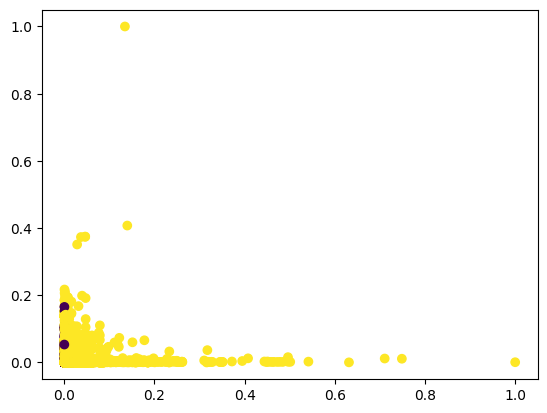

In [75]:
import matplotlib.pyplot as plt
plt.scatter(data_scaled['total_BTC'],data_scaled['size'],c=data_scaled['class'])

In [76]:
X=data_scaled.drop('class',axis=1)
y=data_scaled['class']

In [72]:

%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   ----------------- ---------------------- 102.4/240.0 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 240.0/240.0 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy={1: 10000}, random_state=42) ## creating 10,000 samples for 1
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
from collections import Counter
print(Counter(y_res))


Counter({2: 41500, 1: 10000})


In [86]:
y_res.value_counts()

class
2    41500
1    10000
Name: count, dtype: int64

In [87]:
from sklearn.utils import resample

In [ ]:
data_res=pd.concat([X_res,y_res],axis=1)  ## Concatenated back to DataFrame
data_res

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,0.000000,0.001469,0.000351,0.125000,0.003053,0.000076,0.000000,0.013699,0.000049,0.001263,...,0.001263,0.000490,0.000158,0.001469,6.113009e-04,0.001284,0.002315,2.315078e-03,0.001469,2
1,0.000000,0.134513,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.134513,0.134513,...,0.134513,0.134513,0.134513,0.134513,6.466160e-11,0.006557,0.000032,2.131794e-07,0.134513,2
2,0.000000,0.000006,0.000351,0.125000,0.000000,0.000076,0.000000,0.000000,0.000006,0.000006,...,0.000006,0.000006,0.000006,0.000006,4.715323e-07,0.000006,0.000010,1.010949e-05,0.000006,2
3,0.000000,0.000002,0.000701,0.125000,0.000000,0.000076,0.000000,0.000000,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,1.442451e-06,0.000001,0.000002,2.431246e-06,0.000002,2
4,0.000000,0.000075,0.000351,0.125000,0.000000,0.000076,0.000000,0.000000,0.000075,0.000075,...,0.000075,0.000075,0.000075,0.000075,2.302948e-05,0.000069,0.000119,1.189158e-04,0.000075,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,0.583333,0.000769,0.001403,0.125000,0.000000,0.000076,0.000000,0.000000,0.000769,0.000769,...,0.000769,0.000769,0.000769,0.000769,2.024549e-07,0.000774,0.001211,1.210845e-03,0.000769,1
51496,0.312500,0.000011,0.000701,0.125000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000011,...,0.000011,0.000011,0.000011,0.000011,3.515485e-05,0.000011,0.000035,3.514885e-05,0.000011,1
51497,0.291667,0.000036,0.000701,0.125000,0.000000,0.000000,0.000000,0.000000,0.000036,0.000036,...,0.000036,0.000036,0.000036,0.000036,1.140174e-04,0.000036,0.000114,1.140114e-04,0.000036,1
51498,0.790226,0.000039,0.008991,0.737071,0.011266,0.000076,0.011318,0.000000,0.000002,0.000013,...,0.000013,0.000004,0.000002,0.000040,3.700231e-06,0.000038,0.000062,6.197302e-05,0.000039,1


In [ ]:
data_class2=data_res[data_res['class']==2] ## Separated classes again
data_class1=data_res[data_res['class']==1]
data_class1

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
45,0.000000,0.000545,0.000752,0.500000,0.010687,0.000076,0.006135,0.006849,2.351890e-05,0.000213,...,0.000213,0.000068,0.000047,0.000545,4.978113e-06,0.000547,0.000858,0.000858,0.000545,1
337,0.000000,0.000006,0.003507,0.125000,0.000000,0.000076,0.000000,0.000000,6.029340e-06,0.000006,...,0.000006,0.000006,0.000006,0.000006,4.978799e-06,0.000004,0.000009,0.000009,0.000006,1
338,0.000000,0.000014,0.003507,0.125000,0.001527,0.000076,0.001534,0.000000,1.578466e-07,0.000013,...,0.000013,0.000007,0.000007,0.000014,4.981152e-06,0.000012,0.000021,0.000021,0.000014,1
339,0.000000,0.000097,0.003507,0.125000,0.001527,0.000076,0.001534,0.000000,1.824665e-05,0.000079,...,0.000079,0.000049,0.000049,0.000097,4.982420e-06,0.000096,0.000153,0.000153,0.000097,1
341,0.000000,0.000218,0.003507,0.125000,0.003053,0.000076,0.003067,0.000000,1.112468e-05,0.000137,...,0.000137,0.000073,0.000070,0.000218,4.976113e-06,0.000218,0.000343,0.000343,0.000218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,0.583333,0.000769,0.001403,0.125000,0.000000,0.000076,0.000000,0.000000,7.685867e-04,0.000769,...,0.000769,0.000769,0.000769,0.000769,2.024549e-07,0.000774,0.001211,0.001211,0.000769,1
51496,0.312500,0.000011,0.000701,0.125000,0.000000,0.000000,0.000000,0.000000,1.118791e-05,0.000011,...,0.000011,0.000011,0.000011,0.000011,3.515485e-05,0.000011,0.000035,0.000035,0.000011,1
51497,0.291667,0.000036,0.000701,0.125000,0.000000,0.000000,0.000000,0.000000,3.621481e-05,0.000036,...,0.000036,0.000036,0.000036,0.000036,1.140174e-04,0.000036,0.000114,0.000114,0.000036,1
51498,0.790226,0.000039,0.008991,0.737071,0.011266,0.000076,0.011318,0.000000,1.608432e-06,0.000013,...,0.000013,0.000004,0.000002,0.000040,3.700231e-06,0.000038,0.000062,0.000062,0.000039,1


In [ ]:
data_class2_down = resample(data_class2,replace=False,n_samples=10000,random_state=42) ## downsampled class 2 to 10,000


In [ ]:
data_down = pd.concat([data_class1, data_class2_down]) # final combine
data_down

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
45,0.000000,0.000545,0.000752,0.500,0.010687,0.000076,0.006135,0.006849,2.351890e-05,2.131366e-04,...,2.131366e-04,6.805722e-05,4.747977e-05,0.000545,4.978113e-06,0.000547,0.000858,8.579809e-04,0.000545,1
337,0.000000,0.000006,0.003507,0.125,0.000000,0.000076,0.000000,0.000000,6.029340e-06,6.008953e-06,...,6.008953e-06,6.012115e-06,6.026491e-06,0.000006,4.978799e-06,0.000004,0.000009,9.244863e-06,0.000006,1
338,0.000000,0.000014,0.003507,0.125,0.001527,0.000076,0.001534,0.000000,1.578466e-07,1.349141e-05,...,1.349141e-05,6.817598e-06,6.831975e-06,0.000014,4.981152e-06,0.000012,0.000021,2.128259e-05,0.000014,1
339,0.000000,0.000097,0.003507,0.125,0.001527,0.000076,0.001534,0.000000,1.824665e-05,7.883657e-05,...,7.883657e-05,4.853458e-05,4.854895e-05,0.000097,4.982420e-06,0.000096,0.000153,1.527374e-04,0.000097,1
341,0.000000,0.000218,0.003507,0.125,0.003053,0.000076,0.003067,0.000000,1.112468e-05,1.373330e-04,...,1.373330e-04,7.269891e-05,6.966746e-05,0.000218,4.976113e-06,0.000218,0.000343,3.434502e-04,0.000218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,0.083333,0.000289,0.000351,0.125,0.001527,0.000076,0.001534,0.000000,1.164191e-04,1.727444e-04,...,1.727444e-04,1.445747e-04,1.445891e-04,0.000289,3.809755e-04,0.000169,0.000456,4.555943e-04,0.000289,2
10011,0.145833,0.000004,0.003279,0.500,0.013740,0.000076,0.013804,0.000000,4.398439e-07,4.194862e-07,...,4.194862e-07,4.226367e-07,4.370113e-07,0.000004,2.486985e-06,0.000003,0.000007,6.691812e-06,0.000004,2
5144,0.062500,0.000081,0.000701,0.125,0.001527,0.000153,0.001534,0.000000,2.379608e-07,8.114516e-05,...,8.114516e-05,4.068453e-05,4.069891e-05,0.000081,4.079550e-07,0.000082,0.000085,6.443678e-07,0.000081,2
2965,0.020833,0.004311,0.003507,0.125,0.036641,0.000000,0.033742,0.000000,3.687333e-08,1.578461e-03,...,1.578461e-03,1.724331e-04,6.682697e-05,0.004311,1.358475e-02,0.004340,0.013585,1.358475e-02,0.004311,2


In [ ]:
data_down=data_down.reset_index(drop=True) ## reset index
data_down

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,0.000000,0.000545,0.000752,0.500,0.010687,0.000076,0.006135,0.006849,2.351890e-05,2.131366e-04,...,2.131366e-04,6.805722e-05,4.747977e-05,0.000545,4.978113e-06,0.000547,0.000858,8.579809e-04,0.000545,1
1,0.000000,0.000006,0.003507,0.125,0.000000,0.000076,0.000000,0.000000,6.029340e-06,6.008953e-06,...,6.008953e-06,6.012115e-06,6.026491e-06,0.000006,4.978799e-06,0.000004,0.000009,9.244863e-06,0.000006,1
2,0.000000,0.000014,0.003507,0.125,0.001527,0.000076,0.001534,0.000000,1.578466e-07,1.349141e-05,...,1.349141e-05,6.817598e-06,6.831975e-06,0.000014,4.981152e-06,0.000012,0.000021,2.128259e-05,0.000014,1
3,0.000000,0.000097,0.003507,0.125,0.001527,0.000076,0.001534,0.000000,1.824665e-05,7.883657e-05,...,7.883657e-05,4.853458e-05,4.854895e-05,0.000097,4.982420e-06,0.000096,0.000153,1.527374e-04,0.000097,1
4,0.000000,0.000218,0.003507,0.125,0.003053,0.000076,0.003067,0.000000,1.112468e-05,1.373330e-04,...,1.373330e-04,7.269891e-05,6.966746e-05,0.000218,4.976113e-06,0.000218,0.000343,3.434502e-04,0.000218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.083333,0.000289,0.000351,0.125,0.001527,0.000076,0.001534,0.000000,1.164191e-04,1.727444e-04,...,1.727444e-04,1.445747e-04,1.445891e-04,0.000289,3.809755e-04,0.000169,0.000456,4.555943e-04,0.000289,2
19996,0.145833,0.000004,0.003279,0.500,0.013740,0.000076,0.013804,0.000000,4.398439e-07,4.194862e-07,...,4.194862e-07,4.226367e-07,4.370113e-07,0.000004,2.486985e-06,0.000003,0.000007,6.691812e-06,0.000004,2
19997,0.062500,0.000081,0.000701,0.125,0.001527,0.000153,0.001534,0.000000,2.379608e-07,8.114516e-05,...,8.114516e-05,4.068453e-05,4.069891e-05,0.000081,4.079550e-07,0.000082,0.000085,6.443678e-07,0.000081,2
19998,0.020833,0.004311,0.003507,0.125,0.036641,0.000000,0.033742,0.000000,3.687333e-08,1.578461e-03,...,1.578461e-03,1.724331e-04,6.682697e-05,0.004311,1.358475e-02,0.004340,0.013585,1.358475e-02,0.004311,2


#### save the processed dataframe as csv 

In [98]:
data_down.to_csv('processed.csv',index=False)